In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [2]:
# MLP structure

L = 3

dim = np.zeros((L+1,))

dim[0] = 5
dim[1] = 5
dim[2] = 5
dim[3] = 5
#dim[4] = 7
#dim[5] = 8
#dim[6] = 9
#dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [3]:
# draw random parameters, test generating the matrix and reverting back to parameters 


PHI1i = np.random.normal(0,1,(dim[0],dim[0]))
PHI1i = (PHI1i + PHI1i.T) / 2
PHI1ii = np.random.normal(0,1,(dim[0],dim[0]))
PHI1ii = (PHI1ii + PHI1ii.T) / 2
phi2i = np.random.normal(0,1)
phi2ii = np.random.normal(0,1)
phi2iii = np.random.normal(0,1)
phi2iv = np.random.normal(0,1)
PHILi = np.random.normal(0,1,(dim[3],dim[3]))
PHILi = (PHILi +PHILi.T) / 2
PHILii = np.random.normal(0,1,(dim[3],dim[3]))
PHILii = (PHILii + PHILii.T) / 2
Psi1i = np.random.normal(0,1,(dim[0],1))
Psi1ii = np.random.normal(0,1,(dim[0],1))
PsiLi = np.random.normal(0,1,(dim[3],1))
PsiLii = np.random.normal(0,1,(dim[3],1))
Ome13i = np.random.normal(0,1,(dim[0],1))
Ome13ii = np.random.normal(0,1,(dim[3],1))   


#meang = sm.par2mean(L,dim,tZL)

covg = sm.par2cov(L,dim,PHI1i,PHI1ii,phi2i,phi2ii,phi2iii,phi2iv,PHILi,PHILii,Psi1i,Psi1ii,PsiLi,PsiLii,Ome13i,Ome13ii)


#tZLest = sm.mean2par(L,dim,meang)
#phiest,ttphiest,tPhi1est,tPhiLest,PHI1est,PSI1est,PHILest,ttPHILest = sm.cov2par(L,dim,covg)




In [ ]:

#plt.imshow(covg)
plt.imshow(covg @ covg)
plt.clim((-3.9,3.9))
cb=plt.colorbar(format='%1.0e')
cb.ax.tick_params(labelsize=20)

#plt.xticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5],labels=None)
#plt.yticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5],labels=None)
#plt.tick_params(axis='both',direction='out',length=50,width=2,labelcolor='w')

plt.xticks(ticks=[-0.5, 24.5, 49.5, 74.5],labels=None)
plt.yticks(ticks=[-0.5, 24.5, 49.5, 74.5],labels=None)
plt.tick_params(axis='both',direction='out',length=30,width=2,labelcolor='w')

fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.savefig('cov_ReLU_5555_theory.pdf')
plt.show()





### Surrogate

In [5]:

dim0 = np.copy(dim)
for iL in np.arange(1,L):
    dim0[iL] = 2

covg_big = sm.par2cov(L,dim,PHI1i,PHI1ii,phi2i,phi2ii,phi2iii,phi2iv,PHILi,PHILii,Psi1i,Psi1ii,PsiLi,PsiLii,Ome13i,Ome13ii)
evl_big, evc_big = np.linalg.eigh(covg_big)
covg_big = (evc_big * np.abs(evl_big)) @ evc_big.T

covg_small = sm.par2cov(L,dim0,PHI1i,PHI1ii,phi2i,phi2ii,phi2iii,phi2iv,PHILi,PHILii,Psi1i,Psi1ii,PsiLi,PsiLii,Ome13i,Ome13ii)
evl_small, evc_small = np.linalg.eigh(covg_small)
covg_small = (evc_small * np.abs(evl_small)) @ evc_small.T


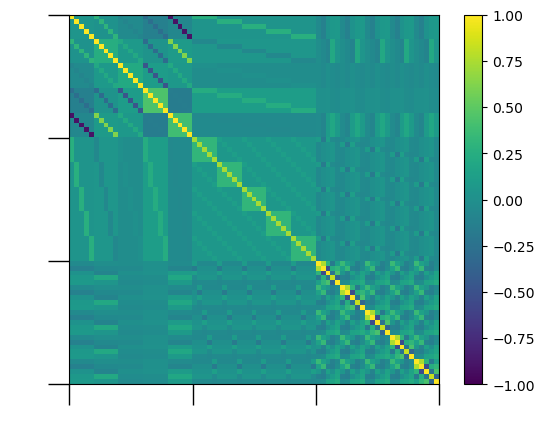

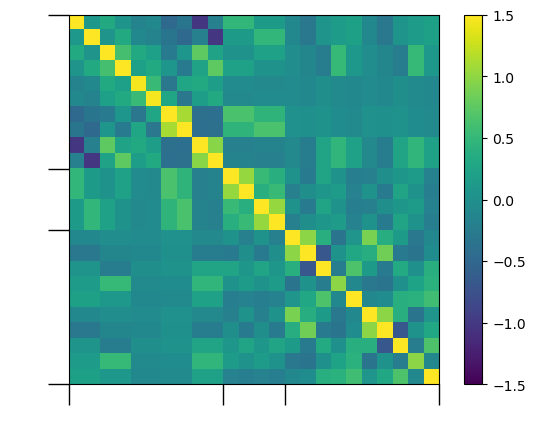

In [12]:

plt.imshow(covg_big)
plt.clim((-1.,1.))
plt.colorbar()

plt.xticks(ticks=[-0.5, 24.5, 49.5, 74.5],labels=None)
plt.yticks(ticks=[-0.5, 24.5, 49.5, 74.5],labels=None)
plt.tick_params(axis='both',direction='out',length=15,width=1,labelcolor='w')
#plt.savefig('matrix_big_ReLU_5555.pdf')

plt.show()



plt.imshow(covg_small)
plt.clim((-1.5,1.5))
plt.colorbar()

plt.xticks(ticks=[-0.5, 9.5, 13.5, 23.5],labels=None)
plt.yticks(ticks=[-0.5, 9.5, 13.5, 23.5],labels=None)
plt.tick_params(axis='both',direction='out',length=15,width=1,labelcolor='w')
#plt.savefig('matrix_small_ReLU_5555.pdf')

plt.show()


In [8]:

evl_big, evc_big = np.linalg.eigh(covg_big)

evl_small, evc_small = np.linalg.eigh(covg_small)


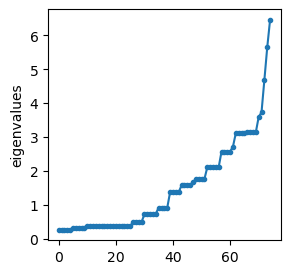

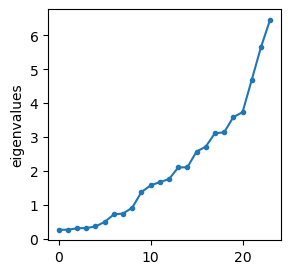

In [13]:

plt.plot(evl_big,marker='.')
plt.ylabel('eigenvalues')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(3, 3)
#plt.savefig('eigenvalues_big_ReLU_5555.pdf',bbox_inches="tight")
plt.show()

plt.plot(evl_small,marker='.')
plt.ylabel('eigenvalues')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(3, 3)
#plt.savefig('eigenvalues_small_ReLU_5555.pdf',bbox_inches="tight")
plt.show()



In [10]:

print(evl_big)
print(evl_small)


[0.25785185 0.25785185 0.25785185 0.25785185 0.25797637 0.30344961
 0.3081264  0.3081264  0.3081264  0.3081264  0.3552416  0.3552416
 0.3552416  0.3552416  0.3552416  0.3552416  0.3552416  0.3552416
 0.3552416  0.3552416  0.3552416  0.3552416  0.3552416  0.3552416
 0.3552416  0.3552416  0.48997222 0.48997222 0.48997222 0.48997222
 0.71252864 0.71252864 0.71252864 0.71252864 0.73791199 0.91230633
 0.91230633 0.91230633 0.91230633 1.37125221 1.37125221 1.37125221
 1.37125221 1.56854114 1.56854114 1.56854114 1.56854114 1.66667548
 1.75406576 1.75406576 1.75406576 1.75406576 2.09977311 2.09977311
 2.09977311 2.09977311 2.10593382 2.57116435 2.57116435 2.57116435
 2.57116435 2.71451955 3.11279967 3.11279967 3.11279967 3.11279967
 3.13599008 3.13599008 3.13599008 3.13599008 3.58880289 3.73045925
 4.68467321 5.64639764 6.4641594 ]
[0.25785185 0.25797637 0.30344961 0.3081264  0.3552416  0.48997222
 0.71252864 0.73791199 0.91230633 1.37125221 1.56854114 1.66667548
 1.75406576 2.09977311 2.10593